# Extension Project 
## Part 1: Extending the Analysis of AGN to include the X-ray band.
This script is intended to provide an extension of the work done in the first script. This extension in it's current form as no real aim and is intended to be exploratory. 


Notes for Project Extension 
* Finish off by fixing the Donley Selection
    * If time permits add the Stern Selection
* Maybe crossmatch with X-Ray data?
    * Focus on one field, CDFS with Chandra 4Ms data
    * chandra space 4Ms or 7Ms survey in topcat
    * Make liberal use of the crossmatching feature in TOPCAT or similarly follow on with this project and use the crossmatching feature in python
    * Use the XMM-Newton data to find the X-ray fluxes of the AGN
    * Use the seleciton criteria in Cowley et al. 2016 to select AGN by Luminosity and Hardness Ratio.
* Xray selection
* AGN Selection using luminosity threshold (CDFS)
* Possible UVJ selection
    * Potentially contaiminated by dusty torus
    * What we could do would be to first plot the UVJ diagram and see how the distribution looks in different redshift bins
    * Then we could plot the UVJ diagram for the AGN selected by the X-ray luminosity and see how that compares to the general population
    * we could also compare this to the IR selected AGNS, maybe using a subset of these AGN that are also X-ray selected.
* Could also look at how star-formation rate is effected between xray agn or ir agn?


HR <- Crossmatch the the HR from the XRAY ZFourge catalogue.



# Cross Matching ZFOURGE with Chandra Data from the 4Ms Survey
* Focus on one field, CDFS with Chandra Data
* chandra space 4Ms survey in topcat (Check Paper)
    * Use the 4Ms CDFS Survey data to find the X-ray luminosities of the AGN, HR, etc.
* Make liberal use of the crossmatching feature in TOPCAT or similarly follow on with this project and create a cross-matching function in python
* Use the seleciton criteria in Cowley et al. 2016 to select AGN by Luminosity and Hardness Ratio.

In [1]:
# Begin by importing the required packages for the project
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import os
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

In [2]:
# Attempt to read in the fits file of the CDFS 7Ms survey or the Chandra 4Ms Survey.
# Noting for the 7Ms survey the the there is a flux but not a value for lumunosity.

# For now we will use the CDFS 4Ms survey (Xue et al. 2011)
# importing the fits file and convert to a dataframe
file_path = os.path.join('crossmatch\CDFS_4Ms.fits')
xray_fits = fits.open(file_path)
xray_df = pd.DataFrame(np.array(xray_fits[1].data).byteswap().newbyteorder())  # Byteswap so that Pandas can read it

file_path = os.path.join('cdfs\cdfs_fluxes.fits')
fluxes_fits = fits.open(file_path)
fluxes_df = pd.DataFrame(np.array(fluxes_fits[1].data).byteswap().newbyteorder())  # Byteswap so that Pandas can read it


In [3]:
element1 = xray_df.iloc[0]
#str(a.decode()) # decode the byte string, this will need to be done for everything that is a byte string



In [4]:
fluxes_df = fluxes_df.rename(columns={'Seq':'id'})

In [5]:
# We now want to read in the CDFS field from the ZFOURGE survey catalogue and do a cross match
# on this particular dataset

catalog_file = os.path.join('cdfs/cdfs.v1.6.11.cat')
cdfs_df = pd.DataFrame(np.genfromtxt(catalog_file, names=True, dtype=None, encoding='ascii'))
cdfs_df.head()

# join the cdfs_df with the flux df, but only add the HR column
cdfs_df = pd.merge(cdfs_df, fluxes_df[['id', 'HR']], on='id')

cdfs_df['Szokoly Selection'] = 0


In [6]:
print(xray_df.columns)

Index(['recno', 'n_ID', 'ID', 'RAJ2000', 'DEJ2000', 'ePos', 'log(P)',
       'log(Pm)', 'OffAng', 'Fcts', 'E_Fcts', 'e_Fcts', 'Scts', 'E_Scts',
       'e_Scts', 'Hcts', 'E_Hcts', 'e_Hcts', 'Fext', 'RAC', 'DEC', 'C-off',
       'Cmag', 'Nx', 'Ccat', 'RAW', 'DEW', 'Wmag', 'RAGD', 'DEGD', 'GDmag',
       'RAG', 'DEG', 'Gmag', 'RAM', 'DEM', 'Mmag', 'RAMY', 'DEMY', 'MYmag',
       'RAS', 'DES', 'Smag', 'RAV', 'DEV', 'Vmag', 'zsp', 'q_zsp', 'r_zsp',
       'zphl', 'b_zphl', 'B_zphl', 'zphla', 'zphc', 'b_zphc', 'B_zphc',
       'q_zphc', 'zphr', 'b_zphr', 'B_zphr', 'zadopt', 'L8', 'RAL8', 'DEL8',
       'L5', 'RAL5', 'DEL5', 'FExp', 'SExp', 'HExp', 'BRat', 'E_BRat',
       'e_BRat', 'PInd', 'EPInd', 'ePInd', 'FFlux', 'SFlux', 'HFlux', 'Lx',
       'OType', 'Notes', 'Simbad'],
      dtype='object')


## Convert RA and DEC columns from HMS and DMS to Decimal Degrees
as both RA and DEC columns are reporting values in HMS and DMS formats respectively, and the ZFOURGE survey is reporting values in decimal degrees, we convert to decimal degrees to make crossmatching easier. 

In [7]:


def HMS_to_DD(x):
    # Define your DMS string
    # Define your HMS string
    hms_str = x.decode()  # Example HMS string

    # Create an Angle object from the HMS string
    angle = Angle(hms_str, unit='hourangle')

    # Get the angle in decimal degrees
    decimal_degrees = angle.degree
    
    return decimal_degrees


def DMS_to_DD(x):
    dms_str = x.decode()  # Example DMS string

    # Create an Angle object from the DMS string
    angle = Angle(dms_str, unit='degree')

    # Get the angle in decimal degrees
    decimal_degrees = angle.degree
    
    
    return decimal_degrees



In [8]:
xray_df['RAJ2000'] = xray_df['RAJ2000'].apply(HMS_to_DD)
xray_df['DEJ2000'] = xray_df['DEJ2000'].apply(DMS_to_DD)


In [9]:
# Inspect the dataframe
xray_df.head()

,recno,n_ID,ID,RAJ2000,DEJ2000,ePos,log(P),log(Pm),OffAng,Fcts,...,PInd,EPInd,ePInd,FFlux,SFlux,HFlux,Lx,OType,Notes,Simbad
0,1,b'M',1,52.899125,-27.860000,0.5,NaN,-8,11.98,186.77,...,1.61,1.85,1.39,1.800000e-14,6.400000e-15,1.100000e-14,2.900000e+44,b'AGN',b'-',b'Simbad'
1,2,b'M',2,52.917167,-27.796278,0.5,-30.9,-8,10.62,155.73,...,1.68,2.03,1.39,5.800000e-15,2.200000e-15,3.500000e-15,3.000000e+44,b'AGN',b'-',b'Simbad'
2,3,b'M',3,52.920875,-27.742972,0.6,-15.6,-8,11.10,96.46,...,0.49,0.74,0.24,1.200000e-14,1.200000e-15,9.800000e-15,NaN,b'AGN',b'-',b'Simbad'
3,4,b'M',4,52.930208,-27.901556,0.8,-6.5,-5,11.41,54.11,...,0.36,0.36,0.36,8.200000e-15,-8.700000e-16,8.700000e-15,1.100000e+44,b'AGN',b'-',b'Simbad'
4,5,b'M',5,52.930917,-27.851056,0.5,-5.9,-8,10.21,108.99,...,0.48,0.88,0.10,1.500000e-15,1.500000e-16,1.300000e-15,NaN,b'AGN',b'-',b'Simbad'


In [10]:
# We now use skycoord to use the converted values to create a skycoord object and find the seperation 
# we can see how this is done with an example below
c1 = SkyCoord(xray_df['RAJ2000'][0]*u.degree, xray_df['DEJ2000'][0]*u.degree, unit='deg', frame='fk5')
c2 =SkyCoord(xray_df['RAJ2000'][1]*u.degree, xray_df['DEJ2000'][1]*u.degree, unit='deg', frame='fk5')
c1.separation(c2).degree


0.06568933968520768

## Attempt to crossmatch ZFOURGE and CDFS 4Ms Survey

In [11]:
cdfs_ra = np.array(cdfs_df['ra'])
cdfs_dec = np.array(cdfs_df['dec'])



xray_ra = np.array(xray_df['RAJ2000'])
xray_dec = np.array(xray_df['DEJ2000'])

In [12]:
max_sep = 1 * u.arcsec # maximum amount of seperation accetable for the crossmatch


cdfs_catalog  = SkyCoord(cdfs_ra*u.degree, cdfs_dec*u.degree, frame='fk5')
xray_catalog = SkyCoord(xray_ra*u.degree, xray_dec*u.degree, frame='fk5')
idx, d2d, d3d = xray_catalog.match_to_catalog_sky(cdfs_catalog)
#idx1, d2d1, d3d1 = catalog.match_to_catalog_sky(c)
sep_constraint = d2d < max_sep
xray_catalog_filter = xray_catalog[sep_constraint]
cdfs_catalog_matches = cdfs_catalog[idx[sep_constraint]]


Text(0.5, 1.0, 'CDFS 4Ms X-ray Sources XMatched to ZFOURGE Catalogue')

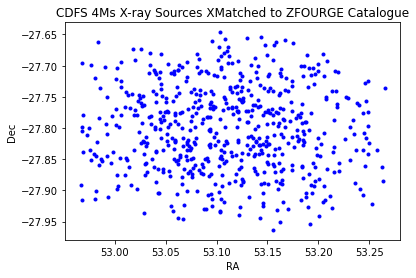

In [13]:
## for the cdfs cat
cdfs_catalog_matches
indicies_to_crossmatch = idx[sep_constraint]

## for the CDFS 4Ms cat
idx2, d2d2, d3d2 = cdfs_catalog.match_to_catalog_sky(xray_catalog)
sep_constraint2 = d2d2 < max_sep
xray_catalog_matches = xray_catalog[idx2[sep_constraint2]]
xray_indicies_to_crossmatch = idx2[sep_constraint2]

plt.plot(cdfs_catalog_matches.ra, cdfs_catalog_matches.dec, 'b.')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('CDFS 4Ms X-ray Sources XMatched to ZFOURGE Catalogue')


Text(0.5, 1.0, 'Separation of X-ray Sources from ZFOURGE Catalogue Sources')

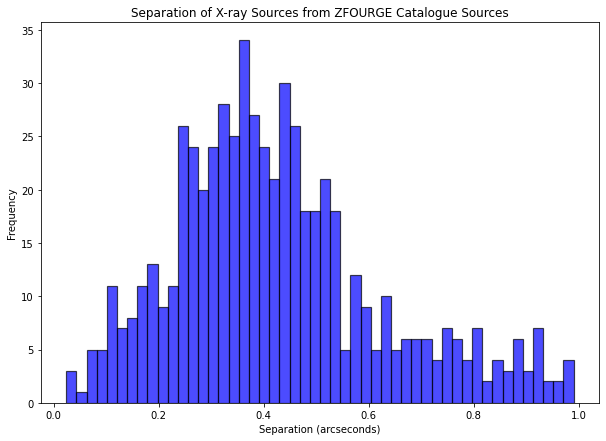

In [14]:
sep = cdfs_catalog_matches.separation(xray_catalog_filter).arcsecond
num_bins = 50

plt.figure(figsize=(10,7))
plt.hist(sep,bins=num_bins, edgecolor='k', alpha=0.7, color='blue', linewidth=1.2)
plt.xlabel('Separation (arcseconds)')
plt.ylabel('Frequency')
plt.title('Separation of X-ray Sources from ZFOURGE Catalogue Sources')

In [15]:
matched_xray_df = xray_df[sep_constraint]
matched_cdfs_df = cdfs_df.iloc[idx[sep_constraint]].reset_index(drop=True)
matched_xray_df
matched_cdfs_df
matched_xray_df = matched_xray_df.reset_index(drop=True)
combined_df = pd.concat([matched_cdfs_df, matched_xray_df], axis=1).copy()
combined_df['Separation'] = sep

Text(0, 0.5, 'Dec')

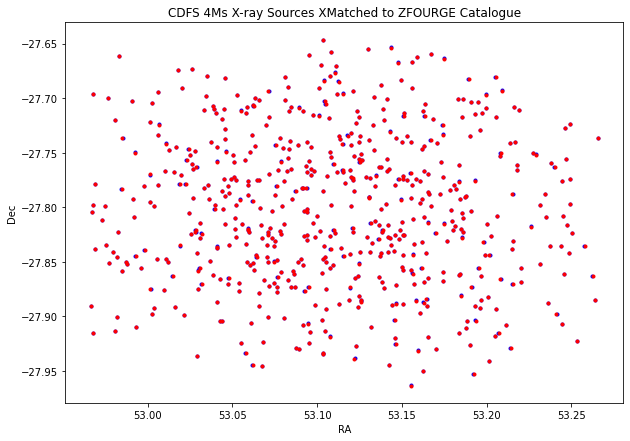

In [16]:
plt.figure(figsize=(10,7))

# Try plotting both ra and dec on the same plot for each survey
plt.plot(combined_df['ra'], combined_df['dec'], 'b.')
plt.plot(combined_df['RAJ2000'], combined_df['DEJ2000'], 'r.')
plt.title('CDFS 4Ms X-ray Sources XMatched to ZFOURGE Catalogue')
plt.xlabel('RA')
plt.ylabel('Dec')

Thus we can see that this is well matched between the dataframes. Now we should be able to use the values for luminosity, and potentially hardness (this may require more crossmatching) to select AGN.

In [17]:
# Remove all null hardness ratios 
combined_df = combined_df[combined_df['HR'].isnull() == False]
combined_df = combined_df[combined_df['Lx'].isnull() == False]


# Statistically derived std-error
lx_err = np.std(combined_df['Lx']) / np.sqrt(np.size(combined_df['Lx']))
print(lx_err)
sigma = 4
combined_df = combined_df[combined_df['Lx'] >= sigma * lx_err]


# We need to check that Luminosity is in the correct units.
combined_df['Lx'].describe()# This is in erg/s as 1*e-7 is 1 erg/s


5.68660873440786e+42


count    1.520000e+02
mean     1.709211e+44
std      2.128204e+44
min      2.300000e+43
25%      4.275000e+43
50%      9.100000e+43
75%      1.900000e+44
max      1.200000e+45
Name: Lx, dtype: float64

In [18]:
# We can now select AGN candidates based on the hardness ratio
#selection_criteria_1 = ()


In [19]:
selection_criteria_1 = (combined_df['Lx'] >= 1e41) & (combined_df['HR'] > -0.2)
selection_criteria_2 = (combined_df['Lx'] >= 1e42) & (combined_df['HR'] <= -0.2)

selection_criteria = selection_criteria_1 | selection_criteria_2

xray_agn_df = combined_df[selection_criteria].copy()


In [20]:
xray_agn_df

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,EPInd,ePInd,FFlux,SFlux,HFlux,Lx,OType,Notes,Simbad,Separation
0,5200,6915.931,2023.670,52.966358,-27.890785,0,116.0,3.572111,0.231306,1.117061,...,1.20,0.78,2.400000e-15,4.500000e-16,1.900000e-15,1.900000e+44,b'AGN',b'-',b'Simbad',0.490763
2,28091,6896.152,6693.791,52.967567,-27.696199,0,291.0,21.562090,0.222892,1.079137,...,1.62,1.13,1.000000e-14,2.800000e-15,6.900000e-15,3.800000e+43,b'AGN',b'-',b'Simbad',0.326908
3,2898,6885.367,1424.547,52.967762,-27.915751,0,249.0,8.809115,0.240751,1.062442,...,0.97,0.97,2.500000e-15,5.900000e-16,-2.500000e-15,9.100000e+43,b'AGN',b'-',b'Simbad',0.359468
4,16026,6885.621,4251.502,52.967918,-27.797960,0,223.0,9.381918,0.231306,1.081725,...,1.26,0.90,1.500000e-15,3.200000e-16,1.200000e-15,1.000000e+44,b'AGN',b'-',b'Simbad',0.355720
5,10975,6868.483,3285.744,52.968670,-27.838202,0,257.0,9.143479,0.231306,1.071893,...,0.79,0.67,7.500000e-15,1.100000e-15,6.400000e-15,4.000000e+44,b'AGN',b'-',b'Simbad',0.374732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,13696,957.488,3812.228,53.247169,-27.816294,0,427.0,22.991150,0.177806,1.056025,...,0.17,0.06,8.300000e-15,5.500000e-16,7.800000e-15,4.500000e+44,b'AGN',b'-',b'Simbad',0.556588
561,16146,910.342,4282.666,53.249367,-27.796692,0,233.0,18.375080,0.251456,1.092856,...,1.85,1.77,1.800000e-14,7.600000e-15,1.000000e-14,8.000000e+44,b'AGN',b'-',b'Simbad',0.310261
562,12960,895.290,3633.337,53.250111,-27.823746,1,51.0,1.177968,0.191329,1.127583,...,0.86,0.39,9.300000e-16,1.200000e-16,8.100000e-16,1.100000e+44,b'AGN',b'-',b'Simbad',0.144471
563,2449,833.335,1266.091,53.253147,-27.922379,3,59.0,19.739740,0.251456,1.160932,...,1.90,1.59,1.300000e-14,5.300000e-15,7.700000e-15,3.400000e+44,b'AGN',b'-',b'Simbad',0.762690


In [21]:

# Applying this selection criteria to the dataframe

print(xray_agn_df['Lx'].describe())

count    1.520000e+02
mean     1.709211e+44
std      2.128204e+44
min      2.300000e+43
25%      4.275000e+43
50%      9.100000e+43
75%      1.900000e+44
max      1.200000e+45
Name: Lx, dtype: float64


In [22]:
xray_agn_df['OType'] = xray_agn_df['OType'].apply(lambda x: x.decode())


In [23]:
xray_agn_df[xray_agn_df['OType'] == 'AGN']
#xray_agn_df.iloc[0]['OType']

,id,x,y,ra,dec,SEflags,iso_area,fap_Ksall,eap_Ksall,apcorr,...,EPInd,ePInd,FFlux,SFlux,HFlux,Lx,OType,Notes,Simbad,Separation
0,5200,6915.931,2023.670,52.966358,-27.890785,0,116.0,3.572111,0.231306,1.117061,...,1.20,0.78,2.400000e-15,4.500000e-16,1.900000e-15,1.900000e+44,AGN,b'-',b'Simbad',0.490763
2,28091,6896.152,6693.791,52.967567,-27.696199,0,291.0,21.562090,0.222892,1.079137,...,1.62,1.13,1.000000e-14,2.800000e-15,6.900000e-15,3.800000e+43,AGN,b'-',b'Simbad',0.326908
3,2898,6885.367,1424.547,52.967762,-27.915751,0,249.0,8.809115,0.240751,1.062442,...,0.97,0.97,2.500000e-15,5.900000e-16,-2.500000e-15,9.100000e+43,AGN,b'-',b'Simbad',0.359468
4,16026,6885.621,4251.502,52.967918,-27.797960,0,223.0,9.381918,0.231306,1.081725,...,1.26,0.90,1.500000e-15,3.200000e-16,1.200000e-15,1.000000e+44,AGN,b'-',b'Simbad',0.355720
5,10975,6868.483,3285.744,52.968670,-27.838202,0,257.0,9.143479,0.231306,1.071893,...,0.79,0.67,7.500000e-15,1.100000e-15,6.400000e-15,4.000000e+44,AGN,b'-',b'Simbad',0.374732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,13696,957.488,3812.228,53.247169,-27.816294,0,427.0,22.991150,0.177806,1.056025,...,0.17,0.06,8.300000e-15,5.500000e-16,7.800000e-15,4.500000e+44,AGN,b'-',b'Simbad',0.556588
561,16146,910.342,4282.666,53.249367,-27.796692,0,233.0,18.375080,0.251456,1.092856,...,1.85,1.77,1.800000e-14,7.600000e-15,1.000000e-14,8.000000e+44,AGN,b'-',b'Simbad',0.310261
562,12960,895.290,3633.337,53.250111,-27.823746,1,51.0,1.177968,0.191329,1.127583,...,0.86,0.39,9.300000e-16,1.200000e-16,8.100000e-16,1.100000e+44,AGN,b'-',b'Simbad',0.144471
563,2449,833.335,1266.091,53.253147,-27.922379,3,59.0,19.739740,0.251456,1.160932,...,1.90,1.59,1.300000e-14,5.300000e-15,7.700000e-15,3.400000e+44,AGN,b'-',b'Simbad',0.762690


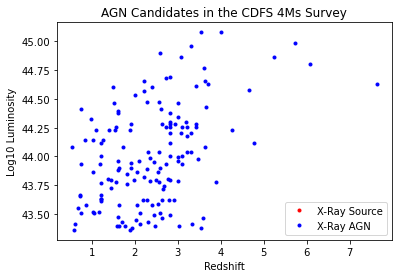

In [24]:
filtered_combined_df = combined_df[~combined_df.isin(xray_agn_df)].copy()

plt.plot((filtered_combined_df['zadopt']), np.log10(filtered_combined_df['Lx']), 'r.',label='X-Ray Source')
plt.plot((xray_agn_df['zadopt']), np.log10(xray_agn_df['Lx']), 'b.', label='X-Ray AGN')
plt.title('AGN Candidates in the CDFS 4Ms Survey')
plt.xlabel('Redshift')
plt.ylabel('Log10 Luminosity')
plt.legend()




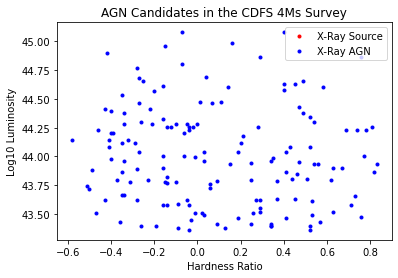

In [25]:

plt.plot((filtered_combined_df['HR']), np.log10(filtered_combined_df['Lx']), 'r.',label='X-Ray Source')
plt.plot((xray_agn_df['HR']), np.log10(xray_agn_df['Lx']), 'b.', label='X-Ray AGN')
plt.title('AGN Candidates in the CDFS 4Ms Survey')
plt.xlabel('Hardness Ratio')
plt.ylabel('Log10 Luminosity')
plt.legend()


In [26]:
# we now want to put a flag in the dataframe to indicate that the Szokoly 2004 catalogue has a match
cdfs_df.loc[xray_agn_df.id, 'Szokoly Selection'] = 1


In [27]:
# Check outputs of selection
cdfs_df['Szokoly Selection'].value_counts()

0    30759
1      152
Name: Szokoly Selection, dtype: int64

In [28]:
# Export the data to be proccessed in a seperate script.



def export_XAGN_data(df, sigma):
    folder_path = 'diagnostic selections'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_name ='CDFS_xagn_selection_'+str(sigma)+'_sigma.csv'
    file_path = os.path.join(folder_path, file_name)
    df.to_csv(file_path, index=False)

# export AGN data based on 
export_XAGN_data(cdfs_df, sigma)  